## Задание 1

### Онофрийчук Илья

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [2]:
def plot_interval_length_second_moment(gamma, sigma, ns, ax):
    length = []
    for n in ns:
        xs = np.random.normal(0, sigma, n)
        one_minus_gamma = scipy.stats.chi2.ppf((1 - gamma) / 2, n)
        one_plus_gamma = scipy.stats.chi2.ppf((1 + gamma) / 2, n)
        length.append(np.sum(xs**2)/one_minus_gamma - np.sum(xs**2)/one_plus_gamma)
    
    ax.set_yscale('log')
    ax.set_title(f'gamma={gamma:.1f}, sigma={sigma:.1f}')
    ax.set_xlabel(f'Number of samples')
    ax.set_ylabel(f'Interval length')
    ax.plot(ns, length, label='item (a)')
    ax.legend()

In [3]:
def plot_interval_length_squared_mean(gamma, sigma, ns, ax):
    length = []
    for n in ns:
        xs = np.random.normal(0, sigma, n)
        three_minus_gamma = scipy.stats.norm.ppf((3 - gamma) / 4)
        three_plus_gamma = scipy.stats.norm.ppf((3 + gamma) / 4)
        length.append(n * np.mean(xs)**2 / three_minus_gamma**2 - n * np.mean(xs)**2 / three_plus_gamma**2)
    
    ax.set_yscale('log')
    ax.set_title(f'gamma={gamma:.1f}, sigma={sigma:.1f}')
    ax.set_xlabel(f'Number of samples')
    ax.set_ylabel(f'Interval length')
    ax.plot(ns, length, label='item (b)')
    ax.legend()

In [4]:
ns = np.arange(25, 5001, 25)
gammas = np.arange(0, 1, 0.2)[1:]
sigmas = [0.5, 0.5, 1, 1]

Графики будем строить в логарифмическом масштабе

## Пункт (а)

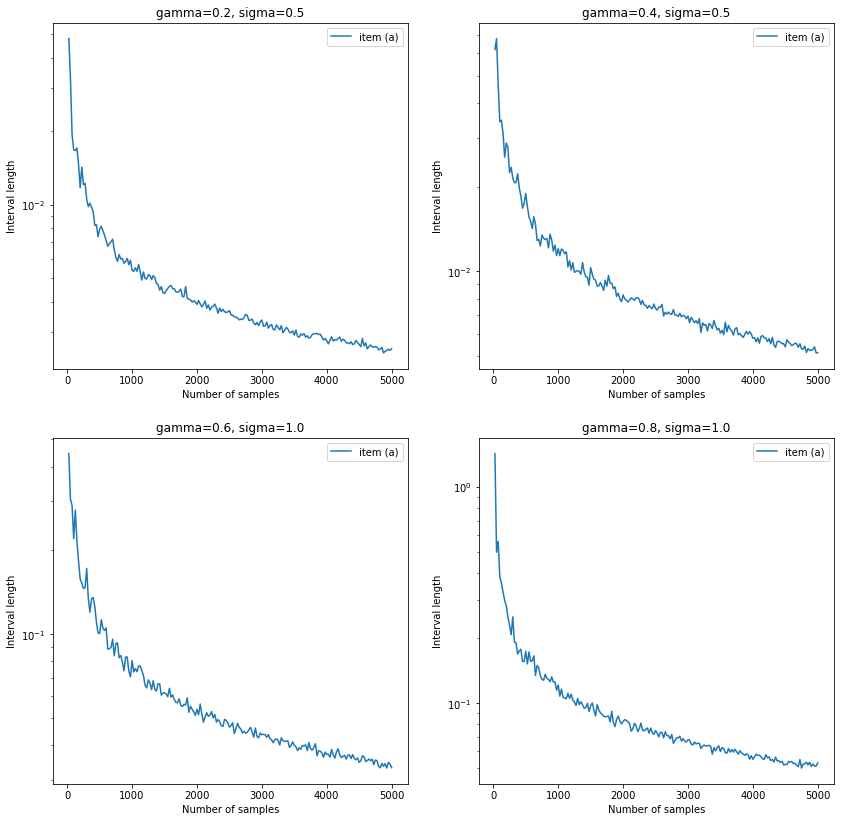

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for gamma, sigma, ax in zip(gammas, sigmas, axs.flat):
    plot_interval_length_second_moment(gamma, sigma, ns, ax)

plt.show()

## Пункт (b)

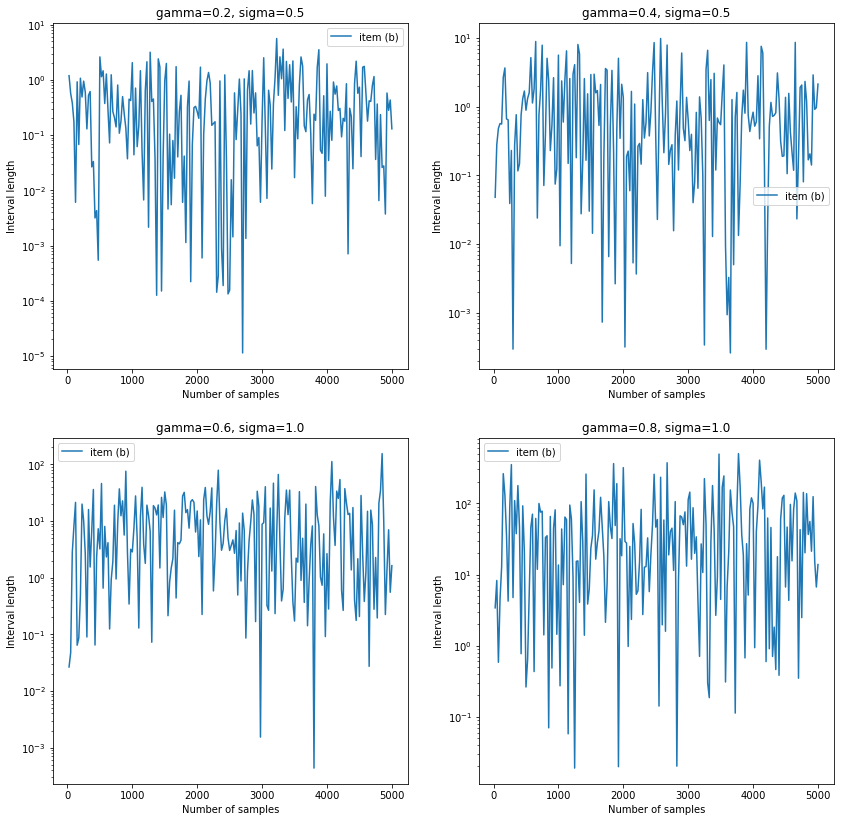

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for gamma, sigma, ax in zip(gammas, sigmas, axs.flat):
    plot_interval_length_squared_mean(gamma, sigma, ns, ax)

plt.show()

## Доверительные интервалы из обеих пунктов, но на одном графике

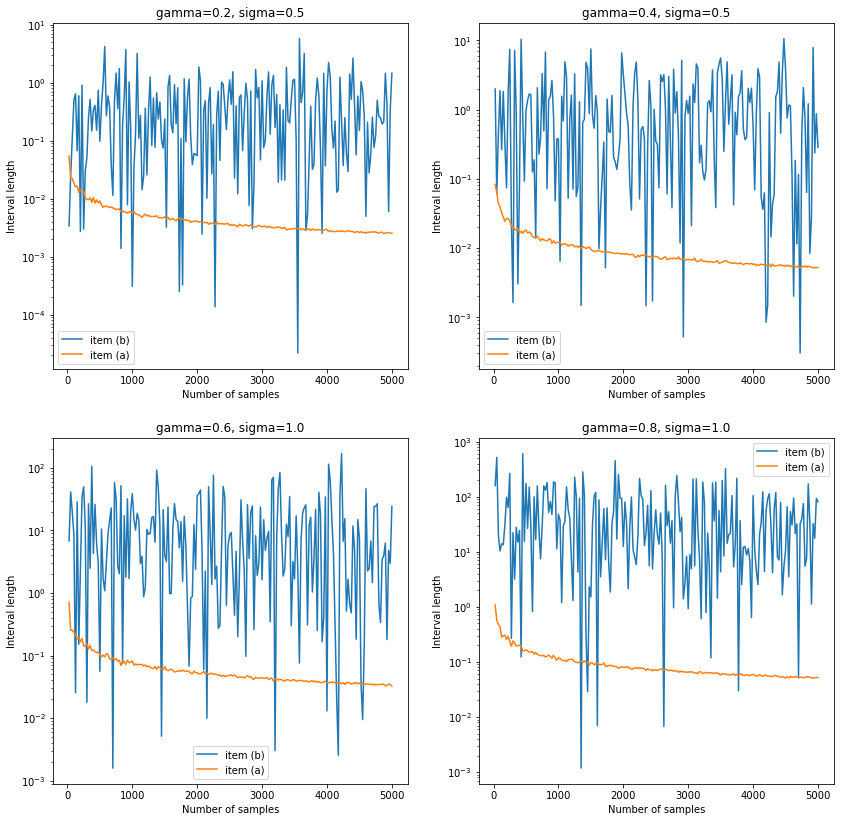

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for gamma, sigma, ax in zip(gammas, sigmas, axs.flat):
    plot_interval_length_squared_mean(gamma, sigma, ns, ax)
    plot_interval_length_second_moment(gamma, sigma, ns, ax)

plt.legend()
plt.show()

## Выводы

По графикам видно, что длина доверительных интервалов из первого пункта убывает довольно быстро при увеличении размера выборки, при этом не случаются большие скачки длины интервалов.

В то же время, длина доверительных интервалов из второго пункта не убывает и сильно колеблется, принимая и маленькие, и большие значения.

Для использования лучше подойдут доверительные интервалы из первого пункта, так как, при увеличении размера выборки, длины интервалов уменьшаются. Доверительные интервалы из второго пункта, кажутся менее употребимыми в использовании, так как, увеличивая размер выборки, длина интервала может оказаться как очень большой, так и очень маленькой.